<h1 align="center">Projet Data Science: Classifiaction de la dataset MNIST</h1> 
<h3 align="center">Réalisé par BRANECI Sofiane & HAMDAD Khellaf </h3>


### Objectif: Réaliser des expérimentations avec divers classifieurs et diffrents paramétrage.


<p><b>MNIST: est une base de données qui contient 70,000 images de chiffre écrit à la main elle était utilisé pour entrainer un réseau de neurones à Convolution(CNN), par Yann LeCun<b/</p> 
<p> <b> 60,000 images sont utiliser pour la phase d'entrainement et 10,000 pour la phase de test</b> </p> 
 
<a href="http://yann.lecun.com/exdb/publis/index.html#lecun-98"> reférence</a>


In [1]:
# importing the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%load_ext autoreload
import Classifiers as cl
import utils 
import evaluation as evals

In [2]:
np.random.seed(42)

#### Loading the data

In [3]:
colums = pd.read_csv("names.csv", sep=';')
train_data = pd.read_csv("train.csv", sep=";", names=colums)
test_data = pd.read_csv("test.csv", sep=";", names=colums)

D:\Anaconda\lib\site-packages\pandas\io\parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [4]:
train_data.head()

,ident,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,label
0,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,10002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,10003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,10004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,10005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [5]:
test_data.head()

,ident,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,label
0,20001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,20002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,20003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,20004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,20005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [6]:
X_test, y_test = test_data.iloc[:, 1:-1].values, test_data.iloc[:, -1].values
X_train, y_train = train_data.iloc[:, 1:-1].values, train_data.iloc[:, -1].values

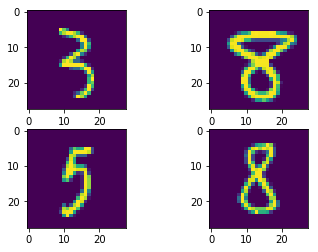

In [7]:
indices = np.random.randint(0, len(X_test), 4)
for index in range(len(indices)):
    axis = plt.subplot(2,2,index+1)
    axis.imshow(X_train[indices[index]].reshape(28,28))

#### Preprocessing & Feature Scaling
###### But: le but de cette étapes et principalement d'améliorer la qualité de nos donnée en éliminant les outliers, les valeur inconnues(remplacer par moyenne de la colonne correspondante) et aussi de mettre les données dans certain intervale 
###### 2 méthodes généralement plus utilisées: standardisation et normalisation 
###### Normalisation: $$\frac{X - min(X)}{max(X) - min(X)}$$
###### Standardisation: $$\frac{X - mean(X)}{\sigma(X)}$$
###### Dans notre cas les valeurs sans dans l'intervale [0, 255] car ce sont des images en noir et blanc, donc une normalisation suffira
###### Un autre bénefice de cette opération c'est que le classifieur converge plus vite car les valeurs elle seront entre 0 et 1, et donc un calcule plus rapide.

In [8]:
X_train = X_train /255
X_test = X_test / 255

### Expérimentation

<h3 align="center"> Binary Classification </h3>

##### Linear Random

Pour ce classifieur, on doit pas s'attendre à une bonne performance car, aucune optimization n'est réaliser sur les poids.
Donc on fait que initialiser le vecteur $w$ et calculer le dot product
$$\hat y = w \cdot x$$

Et on compare $\hat y $ à $y$

tel que: x est un vecteur de données, y est le vrai label et $\hat y$ est le label prédit

In [9]:
# créer l'instance
linear_random = cl.ClassifierLineaireRandom(784)
# train avec X_train et y_train
linear_random.train(X_train, y_train)
# accuracy sur les données de train
train_accuracy = linear_random.accuracy(X_train, y_train)
print("train accuracy:  {}".format(train_accuracy))
# accuracy sur les données de test
test_accuracy = linear_random.accuracy(X_test, y_test)
print("test accuracy:  {}".format(test_accuracy))
# les 2 accuracy sont relativement proche malgré le faible résultat, 
# encore une fois cela est du au manque de l'optimization

Pas d'apprentissage pour ce classifier !
train accuracy:  38.2
test accuracy:  36.7


In [10]:
# cross validation des résulats
results = evals.cross_validation([linear_random], X_train, y_train, 30)
print(results)

Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentissage pour ce classifier !
Pas d'apprentiss

In [11]:
def plot_train_accuracy_vs_test_accuracy(dictionary, classifier_name):
    dikt = dictionary[classifier_name]
    train = dikt['train_acc_list']
    test = dikt['test_acc_list']
    plt.xlabel("k-th fold")
    plt.ylabel("accuracy")
    plt.suptitle("cross validation")
    plt.title("train accuracy vs test accuracy")
    plt.plot(train, label="train accuracy")
    plt.plot(test, label="test accuracy")
    plt.legend()
    plt.show()

In [12]:
def predict_and_save(file_name, columns, cl):
    eval_data = pd.read_csv('eval.csv', sep=";", names=columns,)
    X = eval_data.iloc[:,1:-1].values
    predicted = []
    for x in (X):
        predicted.append(cl.predict(x))
    eval_data["label"] = predicted
    eval_data[['ident', 'label']].to_csv(file_name, sep=";", index=False)

In [13]:
predict_and_save('resultat-1.csv', colums, linear_random)

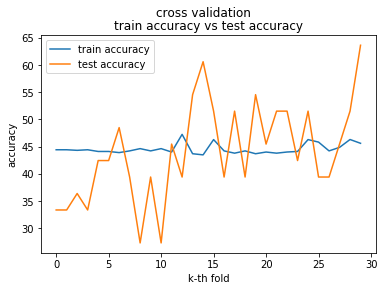

In [14]:
plot_train_accuracy_vs_test_accuracy(results, cl.ClassifierLineaireRandom.__name__)
# avec un 30-fold cross validation on obtien ce graphe, 
# on vois bien que l'accuracy de train reste relativement constante
# par contre on voit dans l'accuracy de test il y'a beaucoup de variance 
# donc notre modéle est en underfitting
# mais cela est dû au faite de ne pas réaliser d'optimisation sur les poids.

#### KNN
Est un algorithme qui appartiens à la famille de Lazy Algorithms, i.e la phase d'apprentissage est retardé, jusqu'à ce que une requête est reçu.

Une nouvelle donnée sera de classe de celle qui a plus de vote parmi les k plus proches voisins
<img src="knn.png">


In [15]:
# créer l'instance
knn = cl.ClassifierKNN(784, 15)
# train avec X_train et y_train
knn.train(X_train, y_train)
# accuracy sur les données de train
train_accuracy = knn.accuracy(X_train, y_train)
print("train accuracy:  {}".format(train_accuracy))
# accuracy sur les données de test
test_accuracy = knn.accuracy(X_test, y_test)
print("test accuracy:  {}".format(test_accuracy))

train accuracy:  95.1
test accuracy:  94.19999999999999


In [16]:
# cross validation des résulats
results = evals.cross_validation([knn], X_train, y_train, 30)
print(results)

{'ClassifierKNN': {'test_acc_list': [78.78787878787878, 87.87878787878788, 87.87878787878788, 81.81818181818183, 96.96969696969697, 81.81818181818183, 90.9090909090909, 100.0, 96.96969696969697, 96.96969696969697, 100.0, 96.96969696969697, 93.93939393939394, 100.0, 96.96969696969697, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0], 'train_acc_list': [96.86520376175548, 96.760710553814, 96.65621734587252, 96.65621734587252, 96.55172413793103, 97.17868338557993, 96.86520376175548, 96.55172413793103, 96.96969696969697, 96.55172413793103, 96.65621734587252, 96.65621734587252, 96.65621734587252, 96.55172413793103, 96.65621734587252, 96.55172413793103, 96.55172413793103, 96.55172413793103, 96.55172413793103, 96.55172413793103, 96.55172413793103, 97.85353535353535, 96.55172413793103, 96.55172413793103, 96.55172413793103, 96.55172413793103, 97.34848484848484, 97.92663476874003, 96.55172413793103, 96.63299663299664], 'train_acc': 96.75381

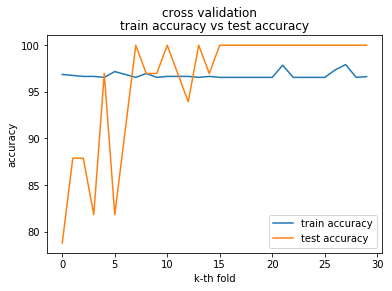

In [17]:
plot_train_accuracy_vs_test_accuracy(results, knn.__class__.__name__)

In [18]:
predict_and_save('resultat-2.csv', colums, knn)

#### Perceptron 
Le perceptron est l'un permier algorithmes d'apprentissage automatique développé par Frank Rosenblatt.

L'algorithme consiste à calculer le dot product $w\cdot x$ entre toutes les données et le vecteur de poids associé, contrairement au Linear Random, il possède un paramétre $\delta$, ce dernier est le learning rate  qui permet de fixer la taille du pas lors de la décente vers le minimume de la fonction d'erreur, utilisé dans la  phase d'optimization qui permet d'ajuster le vecteur $w$, de ce fait améliorer la classificaton.

L'optimzation:
$$ w_{optimized} = w_{old} - \delta * x_{i} * y_{i} $$

In [19]:
# créer l'instance
perceptron = cl.ClassifierPerceptron(784, 0.01)
# train avec X_train et y_train
perceptron.train(X_train, y_train)
# accuracy sur les données de train
train_accuracy = perceptron.accuracy(X_train, y_train)
print("train accuracy:  {}".format(train_accuracy))
# accuracy sur les données de test
test_accuracy = perceptron.accuracy(X_test, y_test)
print("test accuracy:  {}".format(test_accuracy))

train accuracy:  83.5
test accuracy:  81.3


In [20]:
# cross validation des résulats
results = evals.cross_validation([perceptron], X_train, y_train, 50)
print(results)

{'ClassifierPerceptron': {'test_acc_list': [65.0, 75.0, 90.0, 85.0, 90.0, 100.0, 100.0, 100.0, 100.0, 100.0, 95.0, 100.0, 100.0, 95.0, 95.0, 100.0, 100.0, 95.0, 100.0, 95.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0], 'train_acc_list': [95.51020408163265, 96.0204081632653, 96.42857142857143, 96.73469387755102, 97.34693877551021, 95.10204081632652, 96.63265306122449, 98.26530612244898, 98.57142857142858, 98.57142857142858, 98.87755102040816, 99.08163265306122, 98.9795918367347, 99.18367346938776, 98.57142857142858, 98.87755102040816, 99.38775510204081, 99.28571428571429, 99.89795918367346, 99.18367346938776, 99.48979591836735, 99.89795918367346, 99.6938775510204, 98.9795918367347, 99.79591836734694, 99.89795918367346, 99.6938775510204, 99.79591836734694, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0,

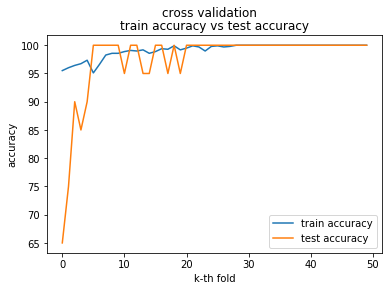

In [21]:
plot_train_accuracy_vs_test_accuracy(results, perceptron.__class__.__name__)

In [22]:
predict_and_save('resulat-2.csv', colums, perceptron)

#### KMeans
Kmeans est un algorithme de clustering, il appartiens à la famille des algorithmes non supervisé

l'algorithme

<ol>
    <li> initialisé k centroids, généralement soit aléatoire soit avec la méthode kmeans++</li>
    <li> calculer la distance entre chaque observation et chaque cluster</li>
    <li> affecter l'observation au cluster le plus proche </li>
    <li> mettre à jour les clusters comme étant la moyenne de toutes les données au sein du cluster</li>
    <li> si les cluters n'ont pas changés alors on stop la procedure sinon, on refait les étapes 2-4 </li>
</ol>    
<img src="kmeans.webp">


##### Note: dans le cas de la classification binaire on transforme la classe -1 en classe 0 après on fait la conversion à nouveau

In [23]:
from models import KMeans, SVMClassifier

In [24]:
kmeans = KMeans(784)
# training
kmeans.train(X_train)

In [25]:
# pas d'accuracy pour les algorithmes de clustering 
eval_data = pd.read_csv('eval.csv', sep=";", names=colums)
X = eval_data.iloc[:,1:-1].values
predicted = []
for x in (X):
    predicted.append(kmeans.predict(x))
predicted = np.array(predicted)
predicted[predicted == 0] = -1
eval_data["label"] = predicted
eval_data[['ident', 'label']].to_csv("resutlat-3.csv", sep=";", index=False)

##### pour trouver le K il faut utiliser Elbow Methode qui consiste à choisire le K qui engendere le min de distant au sein des clusters, connu sous le nom Within Cluster Sum Square


In [ ]:
wcss = []
for i in range(2,11):
    kmeans = KMeans(784, k=i)
    # training
    kmeans.train(X_train)
    wcss.append(kmeans.interia)
plt.plot(range(2, 20), wcss)
plt.ylabel('WCSS')
plt.xlabel("K")
plt.title("Elbow Method")

en vrai on dispose de 10 classe de 0-9 donc le K le plus approprié est 10, qui sera le cas dans une mutli-classification 

#### Support Vector Machines
Développé par Vapkin, c'est un classifieur basé sur un hyperplant, le but est de trouver ce dernier de sort à maximiser la marge entre les différentes classes. On offre une implémentation basé sur l'algorithme <a href="https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf">PEGASOS</a>

<img src="svm.png">

In [28]:
# créer l'instance
svm = SVMClassifier(784)
# train avec X_train et y_train
svm.train(X_train, y_train)
# accuracy sur les données de train
train_accuracy = svm.accuracy(X_train, y_train)
print("train accuracy:  {}".format(train_accuracy))
# accuracy sur les données de test
test_accuracy = svm.accuracy(X_test, y_test)
print("test accuracy:  {}".format(test_accuracy))

train accuracy:  82.89999999999999
test accuracy:  81.2


In [29]:
results = evals.cross_validation([svm], X_train, y_train, 30)
print(results)

{'SVMClassifier': {'test_acc_list': [69.6969696969697, 87.87878787878788, 78.78787878787878, 84.84848484848484, 96.96969696969697, 90.9090909090909, 93.93939393939394, 96.96969696969697, 93.93939393939394, 90.9090909090909, 93.93939393939394, 100.0, 96.96969696969697, 100.0, 60.60606060606061, 100.0, 96.96969696969697, 100.0, 96.96969696969697, 100.0, 90.9090909090909, 100.0, 100.0, 93.93939393939394, 100.0, 96.96969696969697, 100.0, 90.9090909090909, 100.0, 100.0], 'train_acc_list': [94.67084639498434, 96.02925809822361, 96.96969696969697, 96.1337513061651, 93.73040752351098, 96.02925809822361, 93.73040752351098, 94.98432601880877, 95.92476489028213, 94.98834498834499, 90.07314524555903, 94.77533960292581, 95.40229885057471, 95.71577847439916, 78.99686520376176, 95.29780564263322, 95.29780564263322, 97.3876698014629, 96.23824451410658, 94.98432601880877, 95.19331243469175, 96.34273772204807, 93.83490073145245, 96.84343434343434, 90.70010449320795, 95.19331243469175, 94.77533960292581,

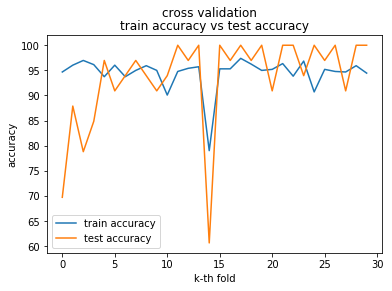

In [30]:
plot_train_accuracy_vs_test_accuracy(results, svm.__class__.__name__)

In [31]:
predict_and_save("resultat-4.csv", colums, svm)

<h4 align='center'> Multi Classe Classification </h4>

In [32]:
kmeans = KMeans(784, k=10)
# training
kmeans.train(X_train)

In [33]:
predict_and_save("resultat-5.csv", colums, kmeans)